# HW3 - DIGIT RECOGNIZER - NAIVE BAYES, RANDOM FOREST, SVM

**In this report we will be Naive Bayes, Random Forest and Support Vector Machine on the 'Digit Recognizer' dataset to predict the digits 0 to 9 in handwriting images. We will also be experimenting with the algorithms by changing the parameters and tuning it, use cross validation technique to increase model performance.**

# Importing the Libraries and Loading the Data:

In [90]:
import matplotlib
import matplotlib.pyplot as plt #For plotting
%matplotlib inline
import numpy as np #Provides fast numerical computing such as arrays and linear algebra
import pandas as pd #Provides R like data structures and a high level API to work with data
from pandas import DataFrame, Series
import seaborn as sns
import os
import warnings # Ignore  the warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit,StratifiedKFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn import model_selection
import sklearn.ensemble as en
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

**Once the required libraries are loaded, we can go ahead and intialize the dataset.**

In [122]:
train_data=pd.read_csv("C:/Users/Aditya Ganesh/Desktop/IST 707 - Data Analytics/HW3_Random forest_NB_SVM/train_data.csv")
test_data=pd.read_csv("C:/Users/Aditya Ganesh/Desktop/IST 707 - Data Analytics/HW3_Random forest_NB_SVM/test_data.csv")
test=pd.read_csv("C:/Users/Aditya Ganesh/Desktop/IST 707 - Data Analytics/HW3_Random forest_NB_SVM/test.csv")

# Data Exploration and Data Preprocessing

In [42]:
#Checking for count and null values in the train data
train_data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [43]:
#Checking for count and null values in the test data
test_data.isnull().any().describe()

count      785
unique       2
top       True
freq       784
dtype: object

In [44]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
test_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Independent variables of training data
X_train=train_data.iloc[:,1:]
#Dependent variable of training data
Y_train=train_data.iloc[:,0]

In [47]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Y_train.head()

0    7
1    1
2    6
3    5
4    0
Name: label, dtype: int64

In [49]:
#Statistical summary of Dependent variable
Y_train.value_counts().describe()

count     10.000000
mean     140.000000
std       11.264497
min      127.000000
25%      132.500000
50%      138.500000
75%      143.500000
max      167.000000
Name: label, dtype: float64

In [50]:
#Independent variables of testing data
X_test=test_data.iloc[:,1:]

In [51]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#Fill na's in the testing data
X_test.fillna(0, inplace=True)

In [53]:
X_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# Visualizing the label feature

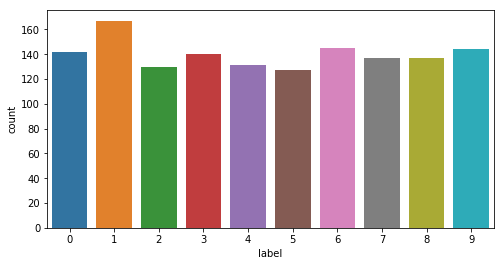

In [54]:
#Plot of label feature in the training data
plt.figure(figsize=(8,4))
sns.countplot(x="label", data=Y_train.to_frame())

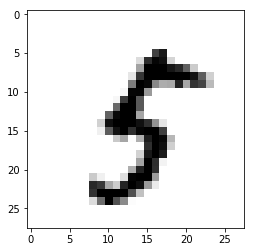

In [55]:
#Displaying a sample data from the training set
number = X_train.iloc[17] 
img_num = number.values.reshape(28, 28) 
plt.imshow(img_num,cmap = matplotlib.cm.binary,interpolation="nearest")
plt.show()

# Scale the training data and testing data

In [56]:
X_train_sc = X_train/255.0
X_test_sc = X_test/255.0

# Naive Bayes Model

In [57]:
# Implement the Gaussian Naive Bayes Model
Gauss = GaussianNB()
Gauss.fit(X_train_sc, Y_train)
score_1 = cross_val_score(Gauss, X_train_sc, Y_train, scoring='accuracy', cv=10).mean()*100
print('Accuracy' + " " + str(score_1) + " " + "%")

Accuracy 59.93308617327857 %


**The Gaussian Naive Bayes model returns a low accuracy of 59.93%.**

In [58]:
Multi = MultinomialNB()
Multi.fit(X_train_sc, Y_train)
score_2 = cross_val_score(Multi, X_train_sc, Y_train, scoring='accuracy', cv=10).mean()*100
print('Accuracy' + " " + str(score_2) + " " + "%")

Accuracy 82.28402593115526 %


**The Multinomial Naive Bayes model returns a accuracy of 82.28%.**

# CROSS VALIDATION FOR NAIVE BAYES 

**We will use GridSearchCV method for Cross Validation. stratified K fold sampling is performed.**

In [91]:
skf = StratifiedKFold(n_splits=10)
params = {}

In [92]:
gs = GridSearchCV(Multi, cv=skf, param_grid=params, return_train_score=True)

In [93]:
gs.fit(X_train_sc, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [94]:
gs.cv_results_

{'mean_fit_time': array([0.03035057]),
 'std_fit_time': array([0.04426996]),
 'mean_score_time': array([0.00130639]),
 'std_score_time': array([0.0026128]),
 'params': [{}],
 'split0_test_score': array([0.80555556]),
 'split1_test_score': array([0.81118881]),
 'split2_test_score': array([0.80985915]),
 'split3_test_score': array([0.84507042]),
 'split4_test_score': array([0.82269504]),
 'split5_test_score': array([0.83571429]),
 'split6_test_score': array([0.85714286]),
 'split7_test_score': array([0.80882353]),
 'split8_test_score': array([0.80147059]),
 'split9_test_score': array([0.83088235]),
 'mean_test_score': array([0.82285714]),
 'std_test_score': array([0.01777032]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.84474522]),
 'split1_train_score': array([0.85361973]),
 'split2_train_score': array([0.85294118]),
 'split3_train_score': array([0.84499205]),
 'split4_train_score': array([0.84988086]),
 'split5_train_score': array([0.84920635]),
 'split6_train_scor

**Use Different parameters and tune the model**

In [96]:
gs.param_grid = {'alpha': [0.1, 2]}
gs.fit(X_train_sc, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 2]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score=True, scoring=None, verbose=0)

In [100]:
accur = cross_val_score(gs, X_train_sc, Y_train, scoring='accuracy', cv=10).mean()*100
print('Accuracy' + " " + str(score_2) + " " + "%")

Accuracy 86.2912887516353 %


**The Naive Bayes model returns an accuracy of 86.29% after performing Cross Validation**

**The trained NB model is applied to the testing data to predict the 'Label' values**

In [103]:
gs.predict(X_test_sc)

array([2, 0, 9, 4, 2, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 0, 3, 1, 9, 0, 9, 1,
       8, 5, 7, 9, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 9, 5, 5, 6, 7, 7, 4, 9,
       8, 7, 8, 8, 6, 8, 6, 8, 1, 3, 8, 2, 1, 8, 6, 0, 9, 1, 7, 0, 0, 0,
       1, 8, 0, 1, 6, 5, 8, 8, 2, 5, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 8, 9, 3, 8, 7, 4, 0, 3, 8, 0, 7, 8, 0, 5, 0, 4,
       0, 0, 6, 1, 1, 8, 1, 1, 5, 8, 3, 7, 2, 1, 6, 3, 8, 7, 8, 9, 3, 5,
       6, 0, 0, 0, 3, 1, 3, 0, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 8, 3, 5, 6,
       5, 8, 7, 5, 7, 8, 3, 0, 4, 5, 1, 8, 7, 6, 3, 0, 2, 7, 9, 6, 1, 3,
       7, 4, 1, 2, 4, 1, 5, 2, 4, 9, 2, 1, 6, 0, 6, 8, 4, 4, 6, 0, 9, 7,
       6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 7, 8, 1, 6, 3, 4,
       2, 3, 1, 5, 2, 8, 9, 6, 1, 0, 0, 4, 9, 1, 8, 2, 2, 8, 8, 6, 8, 6,
       2, 5, 5, 5, 9, 8, 1, 8, 9, 4, 1, 3, 8, 4, 5, 1, 9, 3, 6, 3, 8, 5,
       7, 0, 6, 8, 6, 1, 6, 0, 6, 3, 8, 4, 1, 5, 8, 4, 0, 7, 2, 0, 3, 3,
       7, 8, 9, 9, 5, 7, 7, 4, 9, 6, 3, 0, 3, 3, 6,

# Random Forest Classifier

In [63]:
# Implement the Random Forest Classification model
rf_model= en.RandomForestClassifier()
rf_model.fit(X_train_sc, np.array(Y_train).ravel())
score_2 = cross_val_score(rf_model, X_train_sc, Y_train, scoring='accuracy', cv=10).mean()*100
print('Accuracy' + " " + str(score_2) + " " + "%")

Accuracy 82.48990959506746 %


**The Random Forest model returns a accuracy of 82.48%.**

# CROSS VALIDATION FOR RANDOM FOREST

**Tune the model by using different parameters**

In [64]:
p_test = {'n_estimators':[50, 100,250,500,750,1000]}

#max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features='sqrt',

tuning = GridSearchCV(estimator = en.RandomForestClassifier(random_state=10), 
            param_grid = p_test, scoring='accuracy', n_jobs=4, iid=False, cv=5)
tuning.fit(X_train_sc,np.array(Y_train).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.30080528, 0.57816644, 1.39382973, 2.7926271 , 4.14566517,
         5.2540328 ]),
  'std_fit_time': array([0.0213065 , 0.0136342 , 0.06788602, 0.06083419, 0.0397004 ,
         0.28368549]),
  'mean_score_time': array([0.01008339, 0.01461706, 0.03034325, 0.0611403 , 0.08220997,
         0.11931624]),
  'std_score_time': array([1.66786705e-05, 3.97352000e-03, 1.45290517e-03, 6.65569217e-03,
         6.85162059e-03, 2.13241583e-02]),
  'param_n_estimators': masked_array(data=[50, 100, 250, 500, 750, 1000],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 50},
   {'n_estimators': 100},
   {'n_estimators': 250},
   {'n_estimators': 500},
   {'n_estimators': 750},
   {'n_estimators': 1000}],
  'split0_test_score': array([0.90140845, 0.91549296, 0.91901408, 0.92253521, 0.92605634,
         0.92957746]),
  'split1_test_score': array([0.90106007, 0.91872792, 0.92226148, 

In [65]:
p_test = {'max_depth':[2,5,10,20,50,75,100,200,300,500,700,750]}

# min_samples_split=2, min_samples_leaf=1, max_features='sqrt',

tuning = GridSearchCV(estimator = en.RandomForestClassifier(n_estimators = 750, random_state=10), 
            param_grid = p_test, scoring='accuracy', n_jobs=4, iid=False, cv=5)
tuning.fit(X_train_sc,np.array(Y_train).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([1.2442533 , 2.42330813, 4.11930809, 4.26384416, 4.92199259,
         4.73351555, 4.41273994, 4.20165625, 4.78332295, 5.38702331,
         4.94840908, 4.62252288]),
  'std_fit_time': array([0.06101184, 0.04502854, 0.08603056, 0.10405429, 0.22891686,
         0.14684262, 0.09143492, 0.07693882, 0.45191701, 0.19284647,
         0.07965735, 0.24706174]),
  'mean_score_time': array([0.07211742, 0.08269911, 0.09020767, 0.10448294, 0.10643601,
         0.10641727, 0.09042192, 0.09250045, 0.1217021 , 0.12430954,
         0.10649962, 0.09192715]),
  'std_score_time': array([0.01019603, 0.00918421, 0.00563576, 0.01764903, 0.01655894,
         0.02274679, 0.01102484, 0.00819799, 0.03583763, 0.00648257,
         0.0088586 , 0.01331171]),
  'param_max_depth': masked_array(data=[2, 5, 10, 20, 50, 75, 100, 200, 300, 500, 700, 750],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_valu

In [66]:
p_test = {'min_samples_split':[50, 75, 100, 200, 300, 500, 700, 750]}

# min_samples_leaf=1, max_features='sqrt',

tuning = GridSearchCV(estimator = en.RandomForestClassifier(n_estimators = 750, max_depth = 20,random_state=10), 
            param_grid = p_test, scoring='accuracy', n_jobs=4, iid=False, cv=5)
tuning.fit(X_train_sc,np.array(Y_train).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([2.79946923, 2.11025672, 1.91355643, 1.63837347, 1.56511803,
         1.21679649, 1.21809511, 0.74669495]),
  'std_fit_time': array([0.10918472, 0.0271369 , 0.04544171, 0.09832892, 0.0668324 ,
         0.07123696, 0.05434018, 0.05915252]),
  'mean_score_time': array([0.07698154, 0.06933031, 0.08395238, 0.09454989, 0.08142276,
         0.08289623, 0.09101458, 0.0751965 ]),
  'std_score_time': array([0.01243288, 0.00443438, 0.01392551, 0.03393486, 0.02089055,
         0.0092914 , 0.00711985, 0.01825597]),
  'param_min_samples_split': masked_array(data=[50, 75, 100, 200, 300, 500, 700, 750],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_split': 50},
   {'min_samples_split': 75},
   {'min_samples_split': 100},
   {'min_samples_split': 200},
   {'min_samples_split': 300},
   {'min_samples_split': 500},
   {'min_samples_split': 700},
   {'min_samples_split

In [67]:
p_test = {'min_samples_leaf':[50, 75, 100, 200, 300, 500, 700, 750]}

# max_features='sqrt'

tuning = GridSearchCV(estimator = en.RandomForestClassifier(n_estimators = 750, max_depth = 20,random_state=10), 
            param_grid = p_test, scoring='accuracy', n_jobs=4, iid=False, cv=5)
tuning.fit(X_train_sc,np.array(Y_train).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([1.94126692, 1.69753976, 1.32237673, 0.91351242, 0.78501835,
         0.61528053, 0.64219127, 0.54406285]),
  'std_fit_time': array([0.14239524, 0.15748378, 0.02850905, 0.03065281, 0.04457063,
         0.04622466, 0.03330066, 0.02536901]),
  'mean_score_time': array([0.08303881, 0.08181124, 0.06735768, 0.06123643, 0.05729289,
         0.07448473, 0.05710511, 0.05826764]),
  'std_score_time': array([0.01936133, 0.01371257, 0.01307812, 0.00726322, 0.00743094,
         0.00959223, 0.00488957, 0.00432725]),
  'param_min_samples_leaf': masked_array(data=[50, 75, 100, 200, 300, 500, 700, 750],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 50},
   {'min_samples_leaf': 75},
   {'min_samples_leaf': 100},
   {'min_samples_leaf': 200},
   {'min_samples_leaf': 300},
   {'min_samples_leaf': 500},
   {'min_samples_leaf': 700},
   {'min_samples_leaf': 750}],

In [68]:
p_test = {'max_features':[50, 75, 100, 200, 300, 500, 700, 750, 'sqrt']}

tuning = GridSearchCV(estimator = en.RandomForestClassifier(n_estimators = 750, max_depth = 20,random_state=10), 
            param_grid = p_test, scoring='accuracy', n_jobs=4, iid=False, cv=5)
tuning.fit(X_train_sc,np.array(Y_train).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([ 6.54864006, 10.95807514, 14.63557606, 23.77513628, 32.17146807,
         52.85733752, 72.60392814, 75.51265397,  4.71353831]),
  'std_fit_time': array([0.41475423, 0.10110411, 0.49441977, 1.06032696, 0.18381989,
         2.02704614, 1.73415232, 4.27585   , 0.36723762]),
  'mean_score_time': array([0.09786143, 0.10923738, 0.11135249, 0.10261621, 0.09289508,
         0.12117167, 0.12855339, 0.10560637, 0.10853539]),
  'std_score_time': array([0.02957819, 0.00773681, 0.02242493, 0.01186172, 0.00459862,
         0.03073683, 0.02206014, 0.02958768, 0.01820696]),
  'param_max_features': masked_array(data=[50, 75, 100, 200, 300, 500, 700, 750, 'sqrt'],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 50},
   {'max_features': 75},
   {'max_features': 100},
   {'max_features': 200},
   {'max_features': 300},
   {'max_features': 5

**Final training model for Random Forest Claasifier is built using best paramters**

In [69]:
final_rf_model = en.RandomForestClassifier(n_estimators=750, max_depth=20, max_features='sqrt')
final_rf_model.fit(X_train_sc, Y_train)
score = cross_val_score(final_rf_model, X_train_sc, Y_train, scoring='accuracy', cv=10).mean()*100
print('Accuracy' + " " + str(score) + " " + "%")

Accuracy 91.76753882344278 %


**The Random Forest model returns an accuracy of 91.76% after performing Cross Validation**

**The trained Random Forest model is applied to the testing data to predict the 'Label' values**

In [105]:
final_rf_model.predict(X_test_sc)

array([2, 0, 9, 4, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       1, 5, 7, 4, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9,
       8, 7, 8, 8, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 4, 0, 4, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 1, 4, 3, 8, 7, 4, 0, 3, 2, 0, 7, 3, 0, 5, 0, 3,
       0, 0, 4, 7, 1, 2, 1, 1, 5, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5,
       6, 0, 0, 0, 3, 1, 3, 0, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6,
       5, 1, 7, 5, 7, 8, 3, 0, 4, 5, 1, 8, 7, 6, 3, 0, 2, 7, 9, 6, 1, 3,
       7, 4, 1, 2, 4, 8, 8, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7,
       6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 7, 2, 1, 6, 3, 4,
       2, 3, 1, 5, 2, 0, 9, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6,
       2, 8, 5, 5, 9, 8, 3, 6, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5,
       7, 0, 6, 8, 6, 1, 6, 0, 6, 3, 8, 6, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3,
       7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6,

# Support Vector Machine

**Build a training model using Support Vector Classifier and Radial Basis Function with default settings**

In [70]:
model= svm.SVC(kernel="rbf")
model.fit(X_train_sc, np.array(Y_train).ravel())
score_2 = cross_val_score(model, X_train_sc, Y_train, scoring='accuracy', cv=10).mean()*100
print('Accuracy' + " " + str(score_2) + " " + "%")

Accuracy 86.2912887516353 %


**The SVM model returns a accuracy of 82.48%.**

**Use different paramters to tune the model**

In [ ]:
folds = model_selection.ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
gamma = [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
train_svm= []
for n in gamma:
   svm_model = SVC(C=1,kernel='rbf',gamma=n,cache_size=2000)
   accuracy = cross_val_score(svm_model, X_train_sc, Y_train, cv=folds).mean()*100
   train_svm.append(accuracy)

In [77]:
train_svm

[83.9047619047619,
 73.42857142857142,
 26.523809523809522,
 18.714285714285715,
 17.28571428571429,
 16.04761904761905,
 12.095238095238097,
 11.857142857142858,
 11.761904761904763,
 11.61904761904762,
 11.571428571428573]

# CROSS VALIDATION FOR SVM - GridSearchCV

In [82]:
par_grid = {'C':[1],'gamma':[0.003,0.005,0.025,0.05]}
svm_model_cv = GridSearchCV(svm_model,par_grid,cv=folds,scoring = 'accuracy')
svm_model_cv.fit(X_train_sc, Y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
       error_score='raise-deprecating',
       estimator=SVC(C=1, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1], 'gamma': [0.003, 0.005, 0.025, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

**Finding the best parameters for the SVM Model**

In [83]:
svm_model_cv.best_params_

{'C': 1, 'gamma': 0.025}

In [84]:
svm_model_cv.best_score_

0.9266666666666666

In [88]:
acc = cross_val_score(svm_model_cv, X_train_sc, Y_train, cv=folds).mean()*100
print('Accuracy' + " " + str(acc) + " " + "%")

Accuracy 92.66666666666666 %


**The SVM model returns an accuracy of 92.66% after performing Cross Validation**

**The SVM model is applied to the testing data to predict the 'Label' values**

In [107]:
svm_model_cv.predict(X_test_sc)

array([2, 0, 9, 4, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       1, 5, 7, 4, 2, 7, 9, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9,
       8, 7, 8, 8, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 5, 0, 4, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 1, 4, 3, 8, 7, 4, 0, 3, 2, 0, 7, 3, 0, 5, 0, 3,
       0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5,
       6, 0, 0, 0, 3, 1, 3, 0, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6,
       5, 8, 7, 5, 7, 8, 3, 0, 4, 5, 1, 8, 7, 6, 3, 0, 2, 7, 9, 6, 1, 3,
       7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7,
       6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 7, 2, 1, 6, 3, 4,
       2, 3, 1, 2, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 8, 8, 6, 8, 6,
       2, 8, 5, 5, 4, 8, 3, 8, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5,
       7, 0, 6, 8, 6, 1, 6, 0, 6, 3, 9, 9, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3,
       7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6,

In [124]:
result=svm_model_cv.predict(X_test_sc)

# The 3 different algorithms are compared based on the accuracy rate.

In [111]:
Algorithm_comparison = pd.DataFrame( { "Naive Bayes-MultinomialNB" :score_2,"Random Forest" : score,"SVM-RBF" : acc}, index=[1])

In [112]:
Algorithm_comparison

,Naive Bayes-MultinomialNB,Random Forest,SVM-RBF
1,86.291289,91.767539,92.666667


**By Comparing all the 3 algorithms we are able to see that Support Vector classifier returns highest accuracy for this dataset. Random Forest gave similar results but it was time consuming and the complexity was increased due to tuning of the parameters. Random Forest are robust to overfitting as well. Using Cross validation make all the models computationally expensive when compared to model with default settings. In the end, SVM edged out Random forest with a better accuracy rate and less time consumption.** 